In [5]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

import nnfs
nnfs.init()

### Dot Product, Layers and Matrices

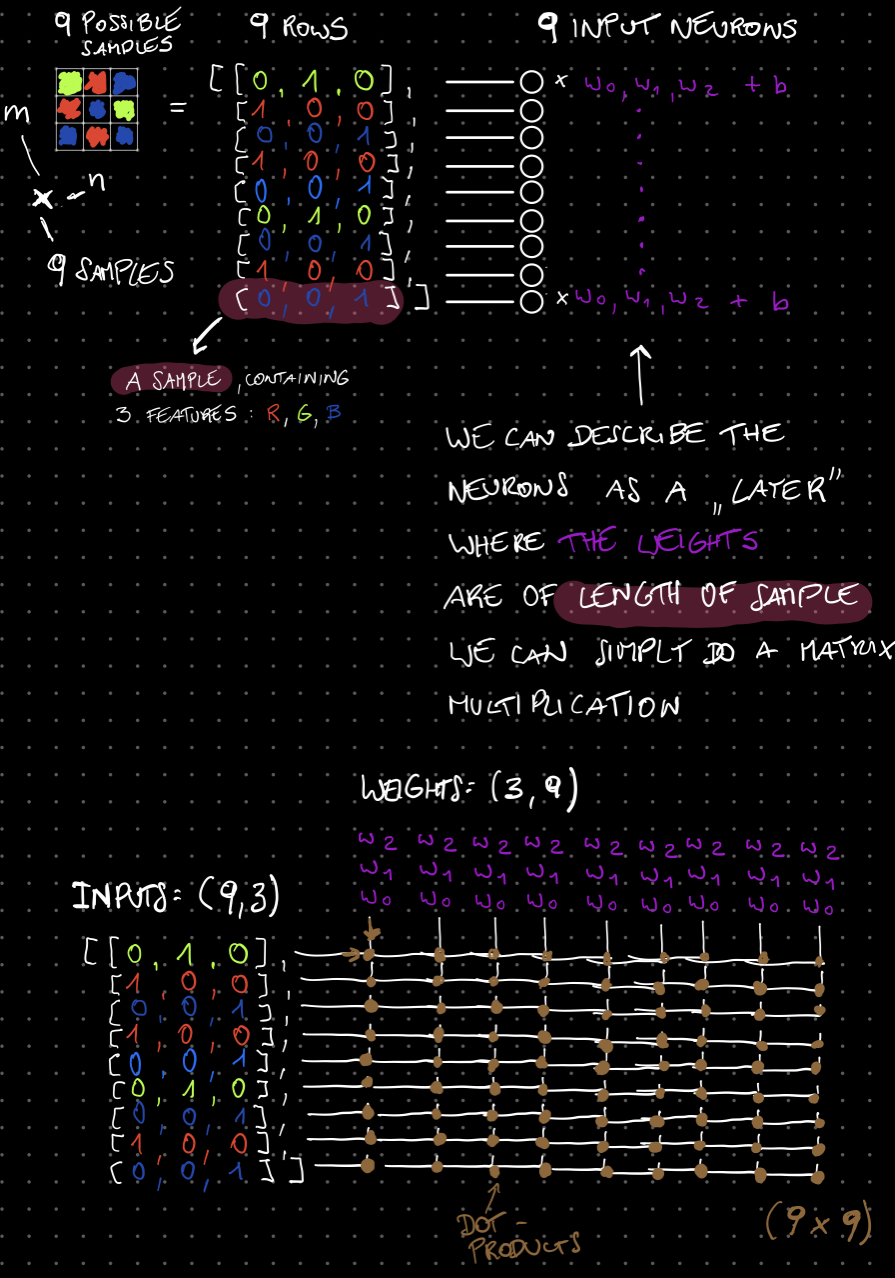

Instead of displaying single neurons we put a Layer together in one code - construct. <br>
This has the advantage that we can compute the multiplication between **inputs** and **weights** more efficiently. <p>
In the above picture an **RGB** image of size 3x3 is translated into an array of size **9*3**, each **R,G,B** channel is a **Feature**, the pixel is a **Sample**. <br>
Since we calculate **Inputs * Weights**, we use the dot product as followed. <br>
**NOTE** for the input layer we will have only ** feature * weight per neuron**, later on **a fully connected layer will have multiple weights per neuron, which depend on the outputs of the previous layer**.

In [26]:
# our rgb 3*3 picture as a normalized numpy arr.
pic_arr = np.array([[0, 1, 0],
                    [1, 0, 0],
                    [0, 0, 1],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 0],
                    [0, 0, 1],
                    [1, 0, 0],
                    [0, 0, 1]]).astype(float)

# intially we will have randomized weights for each neuron in our layer, 
# In a fully connected layer we will have the rows ( Neurons )
# of the previous layer as input for EACH row (Neuron) in the current layer

random_weights = np.array([[ 1.7640524 ,  0.4001572 ,  0.978738  ],
                           [ 2.2408931 ,  1.867558  , -0.9772779 ],
                           [ 0.95008844, -0.1513572 , -0.10321885],
                           [ 0.41059852,  0.14404356,  1.4542735 ],
                           [ 0.7610377 ,  0.12167501,  0.44386324],
                           [ 0.33367434,  1.4940791 , -0.20515826],
                           [ 0.3130677 , -0.85409576, -2.5529897 ],
                           [ 0.6536186 ,  0.8644362 , -0.742165  ],
                           [ 2.2697546 , -1.4543657 ,  0.04575852]]).astype('float32')

print(f'Shape of input {np.shape(pic_arr)}')
print(f'Shape of weights {np.shape(random_weights)}')


# to compute the values of one layer we will take the DOT PRODUCT of inputs and weights, - weights need to be transposed.
layer_inp_weights = pic_arr @ random_weights.T

print(f'weights dot biases {np.shape(layer_inp_weights)}')

# the biases (here they are one to start off) are a singular value per row (Neuron), which we will add in the forward pass
biases = np.ones((1, np.shape(pic_arr)[0]))

# finally we add the biases
layer_inp_weights_biases = layer_inp_weights + biases

print('Inputs * Weights + biases')
print(layer_inp_weights_biases)



Shape of input (9, 3)
Shape of weights (9, 3)
weights dot biases (9, 9)
Inputs * Weights + biases
[[ 1.40015721  2.867558    0.8486428   1.14404356  1.12167501  2.49407911
   0.14590424  1.86443621 -0.45436573]
 [ 2.76405239  3.24089313  1.95008844  1.41059852  1.76103771  1.33367434
   1.3130677   1.65361857  3.26975465]
 [ 1.97873801  0.02272213  0.89678115  2.45427346  1.44386324  0.79484174
  -1.55298972  0.25783497  1.04575852]
 [ 2.76405239  3.24089313  1.95008844  1.41059852  1.76103771  1.33367434
   1.3130677   1.65361857  3.26975465]
 [ 1.97873801  0.02272213  0.89678115  2.45427346  1.44386324  0.79484174
  -1.55298972  0.25783497  1.04575852]
 [ 1.40015721  2.867558    0.8486428   1.14404356  1.12167501  2.49407911
   0.14590424  1.86443621 -0.45436573]
 [ 1.97873801  0.02272213  0.89678115  2.45427346  1.44386324  0.79484174
  -1.55298972  0.25783497  1.04575852]
 [ 2.76405239  3.24089313  1.95008844  1.41059852  1.76103771  1.33367434
   1.3130677   1.65361857  3.26975465

### Training Data

We will use non-linear data using the book's dataset ***nnfs***. <br>
An example of a non-linearily seprable dataset could be:

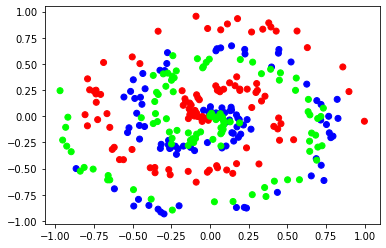

In [11]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

### Dense Layer Class (p.66)

Our ***Dense Layer*** will be initialized on random weights, the class will also have a ***forward*** function. <br>
Our Dense Layer Class will have the following properties:
* ***weights***:
    * are randomly initialized in this example
    * multiplied by a small value `0.01` to keep values small even after several passes
    
* ***biases***:
    * we start with  0 for biases, to trigger the activation function, <br>
    this however, can be dangerous since it could lead to 'dead' neurons, if weights and biases are not sufficient, we pass on a '0' as the next input.


In [9]:
# DENSE LAYER CLASS

# n_inputs -> amount of possible features in the input layer only
# n_neurons -> this is decided by trial and error - no rule how many neurons in the starting layer
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        # n_inputs in the input layer are the features contained in our case (2 - X and Y)
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward (self, inputs):
        self.output = (inputs @ self.weights) + self.biases

Now we try to add the spiral class dataset, in which ***each 'dot'*** is ***a sample*** with ***two features***: in `X`: x,y - values, as well as ***three classes*** (red, green, blue.)<p>
    
we now feed that data into our dense Layer:

In [6]:
# features two input features per neuron and three neurons
dense1 = Layer_Dense(2,3)

In [11]:
dense1.forward(X)

In [16]:
dense1_output = dense1.output

# size of the output array
print(np.shape(dense1_output))

#for each point our layer creates an output from each neuron
# 300 inputs * 3 Neurons = 300, 3 outputs
print(dense1_output[:5])

(300, 3)
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-2.4652983e-05 -2.5955980e-05 -3.9204173e-05]
 [-1.3046230e-04 -1.0068146e-04 -9.4224066e-05]
 [-3.3356680e-04 -2.2089493e-04 -1.2812793e-04]
 [-4.3418157e-04 -2.9118126e-04 -1.7806736e-04]]
